## TİTANİK PROJESİ

### Gerekli Kütüphanelerin Yüklenmesi

In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")
from collections import Counter
import warnings
warnings.filterwarnings("ignore")

### Verinin Yüklenmesi

In [3]:
train_df=pd.read_csv("train.csv")
test_df=pd.read_csv("test.csv")
test_PassengerId=test_df["PassengerId"]

### Veriye İlk Bakış

In [4]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [8]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Değişken Tanımları

1-PassengerID: Unique ıd number each passenger  
2-Survived: Survived(1), Died(0)  
3-Pclass: Passenger Class  
4-Name: Passenger Name  
5-Sex: Gender of passenger  
6-Age: Age of passenger  
7-SibSp: Number of Siblings/Spouses  
8-Parch: Number of Parents/Children  
9-Ticket: Ticket Number  
10-Fare: Amont of spent money for ticket  
11-Cabin: Cabin Category  
12-Embarked: Port where passengers embarked (C=Cherborg, Q=Queenstown, S=Southampton)  

## Tek Değişkenli Analiz

### 1- Kategorik Değişken

In [9]:
def categorical(variable):
    var=train_df[variable]
    varValue=var.value_counts()
    plt.figure(figsize=(9,3))
    plt.bar(varValue.index,varValue)
    plt.xticks(varValue.index,varValue.index.values)
    plt.ylabel("Frekans")
    plt.title(variable)
    plt.show()
    print("{}:\n {}".format(variable,varValue))

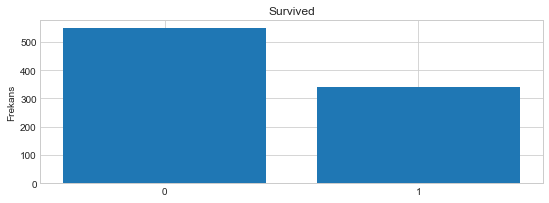

Survived:
 0    549
1    342
Name: Survived, dtype: int64


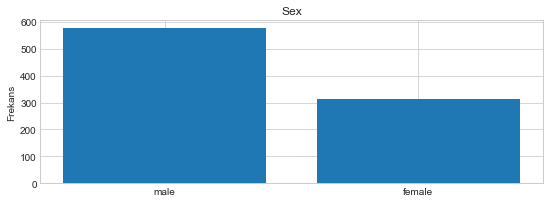

Sex:
 male      577
female    314
Name: Sex, dtype: int64


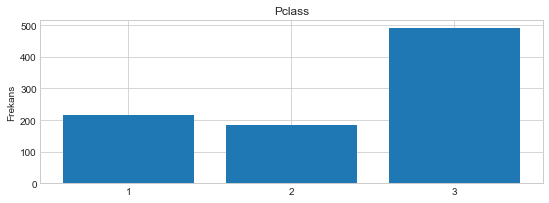

Pclass:
 3    491
1    216
2    184
Name: Pclass, dtype: int64


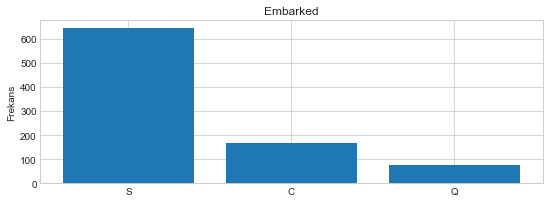

Embarked:
 S    644
C    168
Q     77
Name: Embarked, dtype: int64


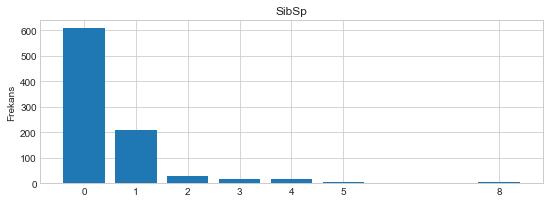

SibSp:
 0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


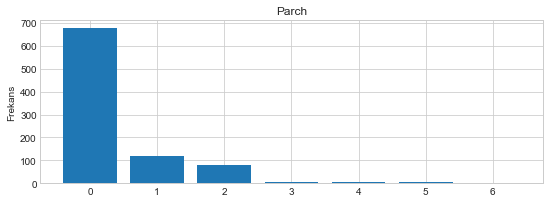

Parch:
 0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


In [10]:
category1=["Survived","Sex","Pclass","Embarked","SibSp","Parch"]
for c in category1:
    categorical(c)

### 2- Sayısal Değişken

In [11]:
def numeric(variable):
    plt.figure(figsize=(9,3))
    plt.hist(train_df[variable],bins=50)
    plt.xlabel(variable)
    plt.ylabel("Frekans")
    plt.show()

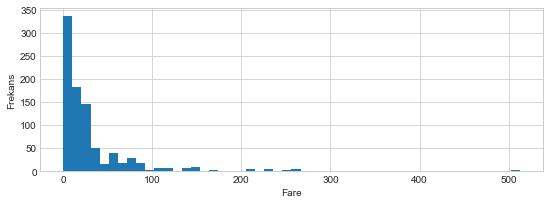

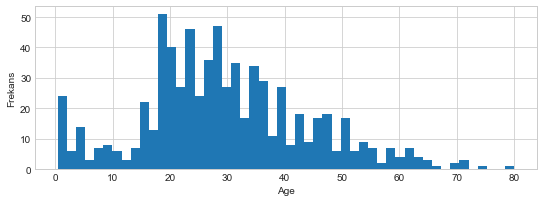

In [12]:
numericVar=["Fare","Age"]
for n in numericVar:
    numeric(n)
    

## Temel Veri Analizi

### Pclass- Survived İlişkisi

In [13]:
train_df[["Pclass","Survived"]].groupby(["Pclass"],as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


### Sex-Survived İlişkisi

In [14]:
train_df[["Sex","Survived"]].groupby(["Sex"],as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


### SibSp-Survived İlişkisi

In [15]:
train_df[["SibSp","Survived"]].groupby(["SibSp"],as_index=False).mean().sort_values(by="Survived",ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


### Parch-Survived İlişkisi

In [16]:
train_df[["Parch","Survived"]].groupby(["Parch"],as_index=False).mean().sort_values(by="Survived",ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


### Embarked-Survived İlişkisi

In [17]:
train_df[["Embarked","Survived"]].groupby(["Embarked"],as_index=False).mean().sort_values(by="Survived",ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


## Aykırı Gözlem Analizi

In [18]:
def outlier(df,features):
    outlier_indices=[]
    
    for c in features:
        Q1=np.percentile(df[c],25)
        Q3=np.percentile(df[c],75)
        IQR=Q3-Q1
        outlier_step=IQR*1.5
        outlier_list=df[(df[c]<Q1-outlier_step)|(df[c]>Q3+outlier_step)].index
        outlier_indices.extend(outlier_list)
    outlier_indices=Counter(outlier_indices)
    multiple_outliers=list(i for i,v in outlier_indices.items()if v>2) ## bir samplede 2den fazla outlier varsa çıkar 1 tane varsa dursun
    return multiple_outliers

In [19]:
train_df.loc[outlier(train_df,["Age","SibSp","Parch","Fare"])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [20]:
train_df=train_df.drop(outlier(train_df,["Age","SibSp","Parch","Fare"]),axis=0).reset_index(drop=True)

## Eksik Veri

### 1- Eksik Verilerin Bulunması

In [21]:

train_df_len=len(train_df)
train_df=pd.concat([train_df,test_df],axis=0).reset_index(drop=True)

In [22]:
train_df.columns[train_df.isnull().any()]

Index(['Age', 'Cabin', 'Embarked', 'Fare', 'Survived'], dtype='object')

In [23]:
train_df.isnull().sum()

Age             256
Cabin          1007
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

### 2- Eksik Verilerin Doldurulması

In [24]:
train_df[train_df["Embarked"].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
60,38.0,B28,NaN,80.0,"Icard, Miss. Amelie",0,62,1,female,0,1.0,113572
821,62.0,B28,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,830,1,female,0,1.0,113572


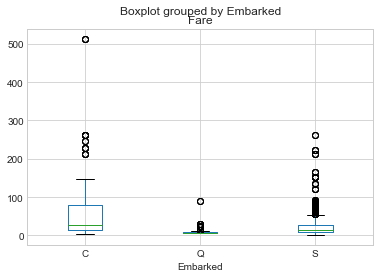

In [25]:
# Fare değerine göre doldur
train_df.boxplot(column="Fare",by="Embarked")
plt.show()

In [26]:
train_df["Embarked"]=train_df["Embarked"].fillna("C")

In [27]:
train_df[train_df["Embarked"].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket


In [28]:
train_df[train_df["Fare"].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
1033,60.5,NaN,S,NaN,"Storey, Mr. Thomas",0,1044,3,male,0,NaN,3701


In [29]:
train_df[train_df["Pclass"]==3]["Fare"].mean()

12.741219971469327

In [30]:
train_df["Fare"]=train_df["Fare"].fillna(np.mean(train_df[train_df["Pclass"]==3]["Fare"]))

In [31]:
train_df[train_df["Fare"].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket


## Korelasyon Matrisi

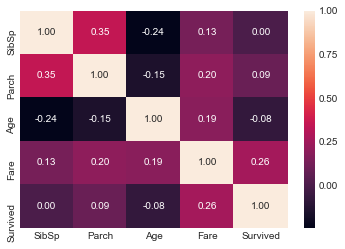

In [32]:
list1=["SibSp","Parch","Age","Fare","Survived"]
sns.heatmap(train_df[list1].corr(),annot=True,fmt=".2f")
plt.show()

## Özellik Analizleri

### 1- SibSp-Survived

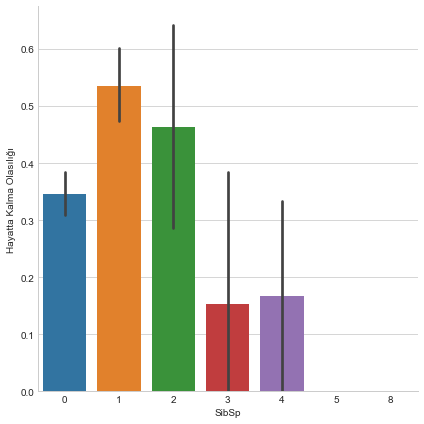

In [33]:
g=sns.factorplot(x="SibSp",y="Survived",data=train_df,kind="bar",size=6)
g.set_ylabels("Hayatta Kalma Olasılığı")

### 2- Parch-Survived

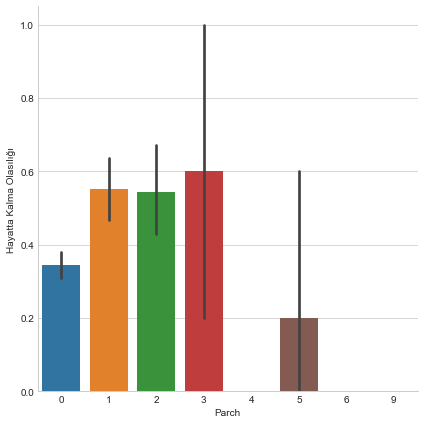

In [35]:
g=sns.factorplot(x="Parch",y="Survived",data=train_df,kind="bar",size=6)
g.set_ylabels("Hayatta Kalma Olasılığı")
plt.show()

### 3- Pclass-Survived

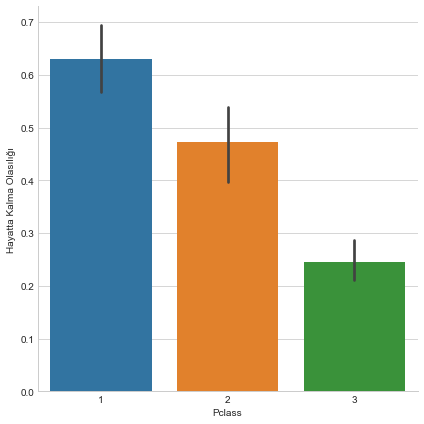

In [37]:
g=sns.factorplot(x="Pclass",y="Survived",data=train_df,kind="bar",size=6)
g.set_ylabels("Hayatta Kalma Olasılığı")
plt.show()

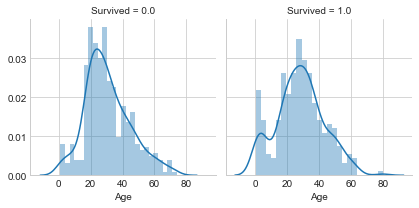

In [38]:
g=sns.FacetGrid(train_df,col="Survived")
g.map(sns.distplot,"Age",bins=25)
plt.show()

### 4- Pclass-Survived-Age

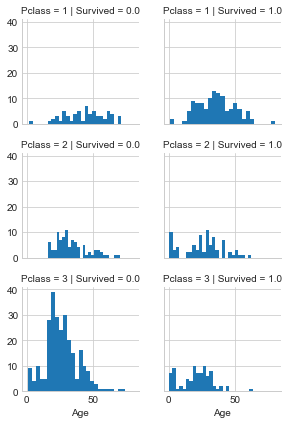

In [39]:
g=sns.FacetGrid(train_df,col="Survived",row="Pclass",size=2)
g.map(plt.hist,"Age",bins=25)
g.add_legend()
plt.show()

### 5- Embarked-Sex-Pclass-Survived

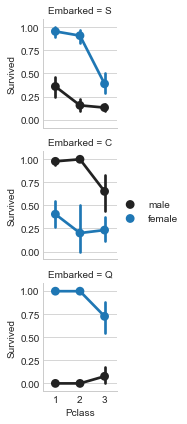

In [41]:
g=sns.FacetGrid(train_df,row="Embarked",size=2)
g.map(sns.pointplot,"Pclass","Survived","Sex")
g.add_legend()
plt.show()

### 6- Embarked-Sex-Fare-Survived

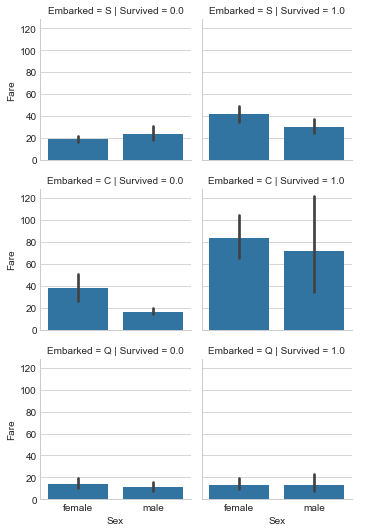

In [42]:
g=sns.FacetGrid(train_df,row="Embarked",col="Survived",size=2.5)
g.map(sns.barplot,"Sex","Fare")
g.add_legend()
plt.show()

## Age Değişkeninin Eksik Değerlerini Doldurma

In [43]:
train_df[train_df["Age"].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
5,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,6,3,male,0,0.0,330877
17,NaN,NaN,S,13.0000,"Williams, Mr. Charles Eugene",0,18,2,male,0,1.0,244373
19,NaN,NaN,C,7.2250,"Masselmani, Mrs. Fatima",0,20,3,female,0,1.0,2649
26,NaN,NaN,C,7.2250,"Emir, Mr. Farred Chehab",0,27,3,male,0,0.0,2631
27,NaN,NaN,Q,7.8792,"O'Dwyer, Miss. Ellen ""Nellie""",0,29,3,female,0,1.0,330959
28,NaN,NaN,S,7.8958,"Todoroff, Mr. Lalio",0,30,3,male,0,0.0,349216
30,NaN,B78,C,146.5208,"Spencer, Mrs. William Augustus (Marie Eugenie)",0,32,1,female,1,1.0,PC 17569
31,NaN,NaN,Q,7.7500,"Glynn, Miss. Mary Agatha",0,33,3,female,0,1.0,335677
35,NaN,NaN,C,7.2292,"Mamee, Mr. Hanna",0,37,3,male,0,1.0,2677
41,NaN,NaN,C,7.8958,"Kraeff, Mr. Theodor",0,43,3,male,0,0.0,349253


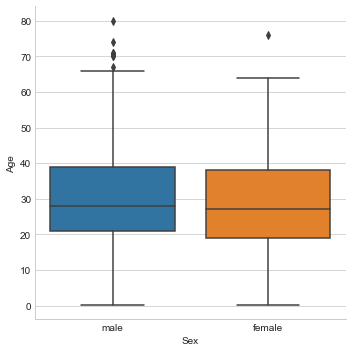

In [44]:
sns.factorplot(x="Sex",y="Age",data=train_df,kind="box")
plt.show()

Medyan değerleri birbirine yakın olduğu eksik yaş değerlerini cinsiyete göre tahmin edemeyiz

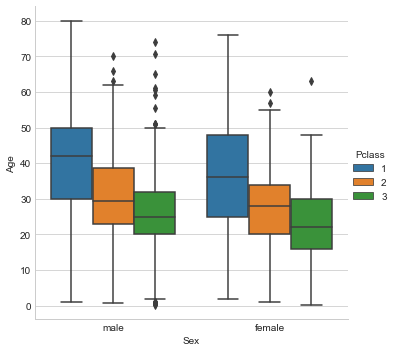

In [46]:
sns.factorplot(x="Sex",y="Age",hue="Pclass",data=train_df,kind="box")
plt.show()

Yaş ortalaması: 1.sınıf>2.sınıf>3.sınıf  
Pclass değeri eksik yaş değerlerini tahmin etmede kullanılabilir

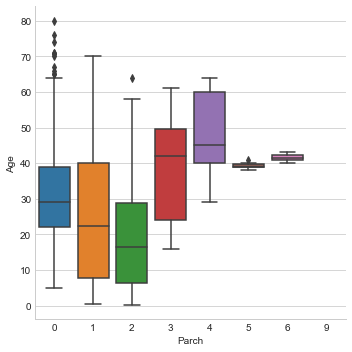

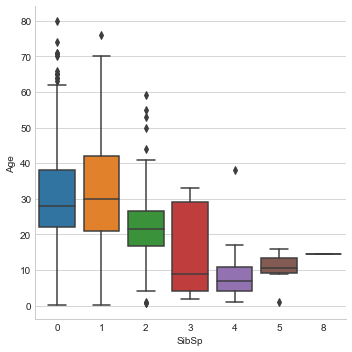

In [48]:
sns.factorplot(x="Parch",y="Age",data=train_df,kind="box")
sns.factorplot(x="SibSp",y="Age",data=train_df,kind="box")
plt.show()

In [49]:
train_df["Sex"]=[1 if i=="male" else 0 for i in train_df["Sex"]]

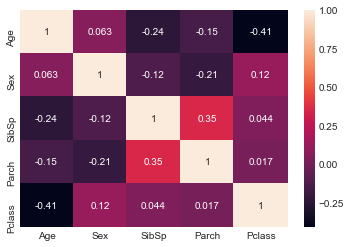

In [50]:
sns.heatmap(train_df[["Age","Sex","SibSp","Parch","Pclass"]].corr(),annot=True)
plt.show()

Age değişkeni ile SibSp,Parch ve Pclass değişkenleri arasında korelasyon olduğu görülmektedir. Bu yüzden
eksik Age değerlerini doldurmak için bu değişkenler kullanılabilir.

In [51]:
index_nan_age = list(train_df["Age"][train_df["Age"].isnull()].index)
for i in index_nan_age:
    age_pred = train_df["Age"][((train_df["SibSp"] == train_df.iloc[i]["SibSp"]) &(train_df["Parch"] == train_df.iloc[i]["Parch"])& (train_df["Pclass"] == train_df.iloc[i]["Pclass"]))].median()
    age_med = train_df["Age"].median()
    if not np.isnan(age_pred):
        train_df["Age"].iloc[i] = age_pred
    else:
        train_df["Age"].iloc[i] = age_med

In [53]:
train_df[train_df["Age"].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
